# Portfolio Project: Term Deposit Marketing

## Introduction
The primary objective of this project is developing a robust machine learning system that leverages information coming from call center data in the European banking market. Additionally, this machine learning system will offer high success outcomes while offering interpretability for clients to make informed decisions. It needs to be predicted whether or not a customer will subscribe to a term deposit.

## Data Description
The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years.<br>
- ``age`` : age of customer (numeric)
- ``job`` : type of job (categorical)
- ``marital`` : marital status (categorical)
- ``education`` (categorical)
- ``default``: has credit in default? (binary)
- ``balance``: average yearly balance, in euros (numeric)
- ``housing``: has a housing loan? (binary)
- ``loan``: has personal loan? (binary)
- ``contact``: contact communication type (categorical)
- ``day``: last contact day of the month (numeric)
- ``month``: last contact month of year (categorical)
- ``duration``: last contact duration, in seconds (numeric)
- ``campaign``: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- ``y``: has the client subscribed to a term deposit? (binary)

## Exploratory Data Analysis
In this step, some exploratory data analysis is performed to the given data set in order to find some interesting insights, such as detection of missing data, the type of variables the data set has, the distribution for each variable, and how correlated these variables are with each other.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import classification_report, f1_score, accuracy_score, _scorer, confusion_matrix
warnings.filterwarnings('ignore')

In [2]:
deposit = pd.read_csv('term-deposit-marketing-2020.csv')
deposit.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [3]:
deposit.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
count,40000.000000,40000,40000,40000,40000,40000.000000,40000,40000,40000,40000.000000,40000,40000.000000,40000.000000,40000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,11,NaN,NaN,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,no
freq,NaN,9383,24386,20993,39191,NaN,24031,33070,24914,NaN,13532,NaN,NaN,37104
mean,40.544600,NaN,NaN,NaN,NaN,1274.277550,NaN,NaN,NaN,16.017225,NaN,254.824300,2.882175,NaN
std,9.641776,NaN,NaN,NaN,NaN,2903.769716,NaN,NaN,NaN,8.278127,NaN,259.366498,3.239051,NaN
min,19.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,54.000000,NaN,NaN,NaN,8.000000,NaN,100.000000,1.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,407.000000,NaN,NaN,NaN,17.000000,NaN,175.000000,2.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1319.000000,NaN,NaN,NaN,21.000000,NaN,313.000000,3.000000,NaN


In [4]:
deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [5]:
deposit.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [6]:
deposit['y'].value_counts(normalize = True)

no     0.9276
yes    0.0724
Name: y, dtype: float64

Based on the outputs above, the following can be determined:
- The dataset has 40,000 observations and 14 variables
- There are 5 numerical variables (``age``, ``balance``, ``day``, ``duration``, and ``campaign``), 5 categorical variables (``job``, ``marital``, ``education``, ``contact``, and ``month``), and 4 binary variables(``default``, ``housing``, ``loan``, and ``y``)
- There are no missing values
- The proportion of clients that did not subscribe to a term deposit (92.8%) is relatively higher than the clients that did (7.2%)<br>

Different analyses need to be performed based on the different types of variables on this dataset.

### Catagorical and Target Variables

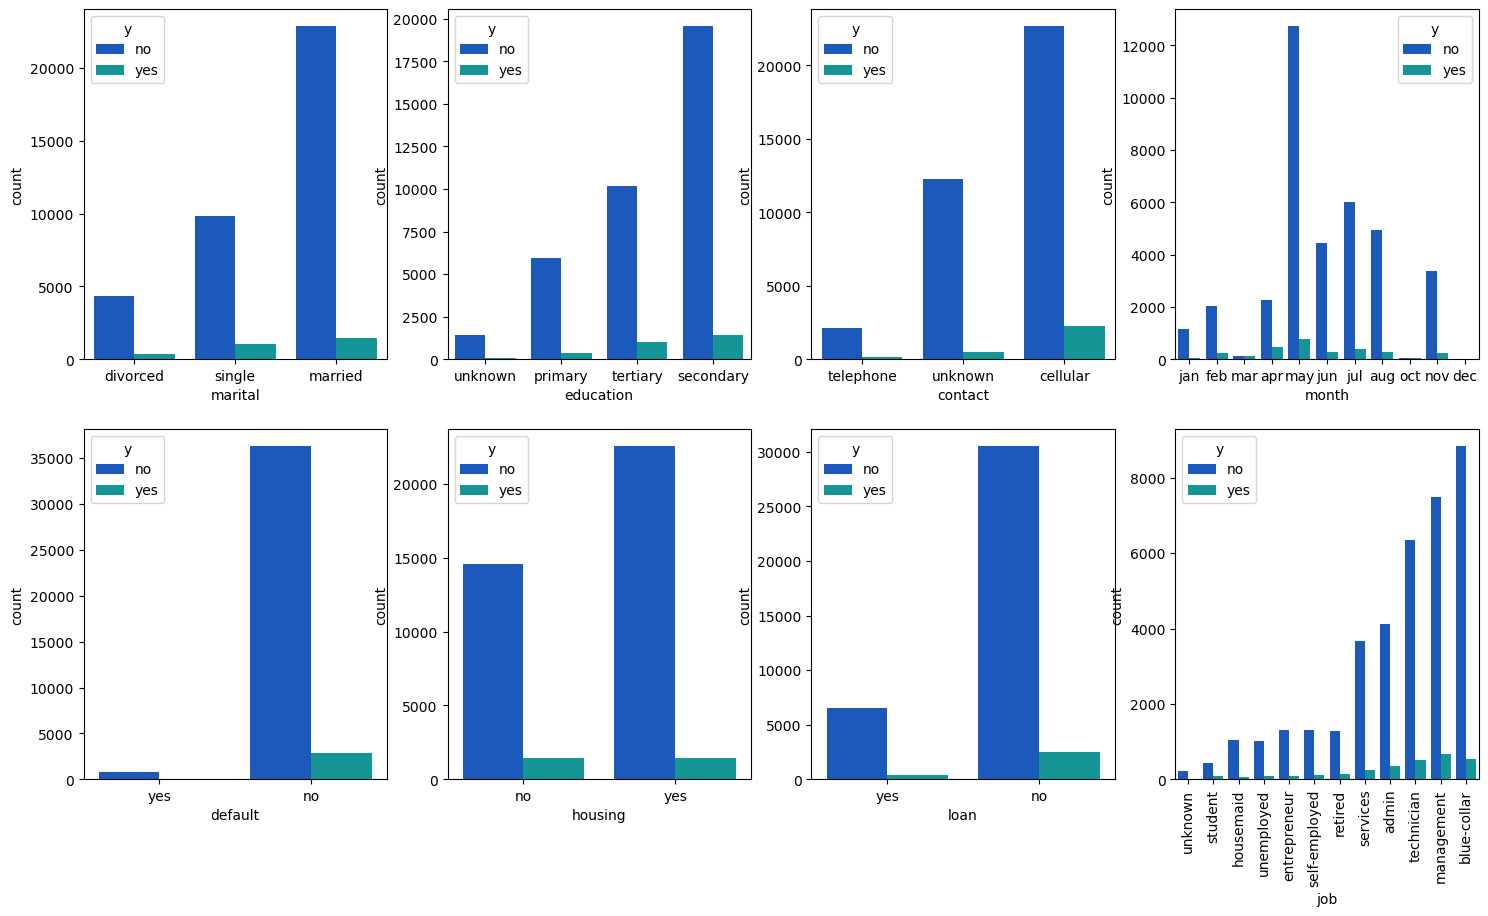

<Figure size 640x480 with 0 Axes>

In [7]:
fig, axes = plt.subplots(2,4, figsize = (18,10))
sns.countplot(ax = axes[0,0], x = 'marital', data = deposit, palette = 'winter', hue = 'y', 
              order = deposit['marital'].value_counts(ascending = True).index)
sns.countplot(ax = axes[0,1], x = 'education', data = deposit, palette = 'winter', hue = 'y', 
              order = deposit['education'].value_counts(ascending = True).index)
sns.countplot(ax = axes[0,2], x = 'contact', data = deposit, palette = 'winter', hue = 'y', 
              order = deposit['contact'].value_counts(ascending = True).index)
sns.countplot(ax = axes[0,3], x = 'month', data = deposit, palette = 'winter', hue = 'y', 
              order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec'])
sns.countplot(ax = axes[1,0], x = 'default', data = deposit, palette = 'winter', hue = 'y', 
              order = deposit['default'].value_counts(ascending = True).index)
sns.countplot(ax = axes[1,1], x = 'housing', data = deposit, palette = 'winter', hue = 'y', 
              order = deposit['housing'].value_counts(ascending = True).index)
sns.countplot(ax = axes[1,2], x = 'loan', data = deposit, palette = 'winter', hue = 'y', 
              order = deposit['loan'].value_counts(ascending = True).index)
sns.countplot(ax = axes[1,3], x = 'job', data = deposit, palette = 'winter',hue = 'y', 
              order = deposit['job'].value_counts(ascending = True).index)
axes[1,3].set_xticklabels(labels = axes[1,3].get_xticklabels(),rotation = 90)
plt.show()
plt.clf()

Based on the barplots above, it can be noticed the clients that tend to not subscribe to a term deposit share some common characteristics with the clients that tend to do so:
- Married clients
- Clients with secondary education
- Clients that use cellular as contact communication type
- Clients with May as the last month of contact; it happens to notice that there are no records of September as the last month of contact
- Clients that have no credit in default
- Clients that have a housing loan
- Clients that have a blue-collar job

### Numerical and Target Variables

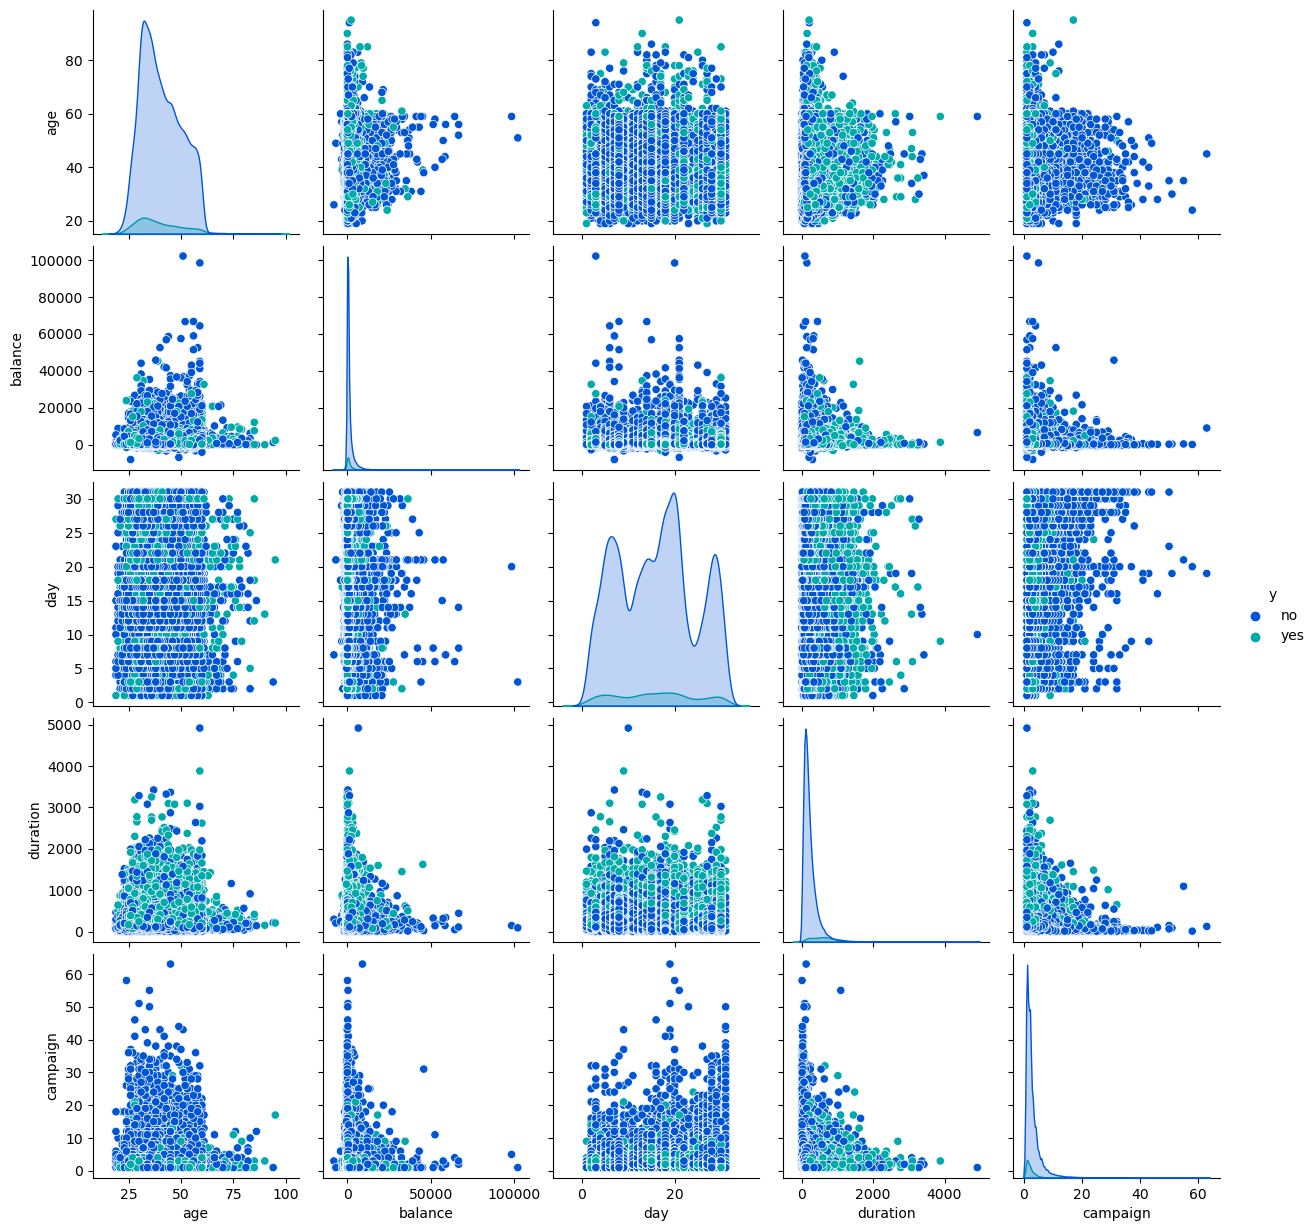

<Figure size 640x480 with 0 Axes>

In [8]:
sns.pairplot(deposit[['age', 'balance', 'day', 'duration', 'campaign','y']], hue = 'y', palette = 'winter')
plt.show()
plt.clf()

Based on these pairplots, it can be noticed that most of the numerical variables are right-skewed distributed; it seems that clients do not subscribe to a term deposit in the earliest stages based on the different numerical variables. ``day`` variable is multimodal; it seems that clients do not susbcribe to a term deposit for particular last contact days of the month.

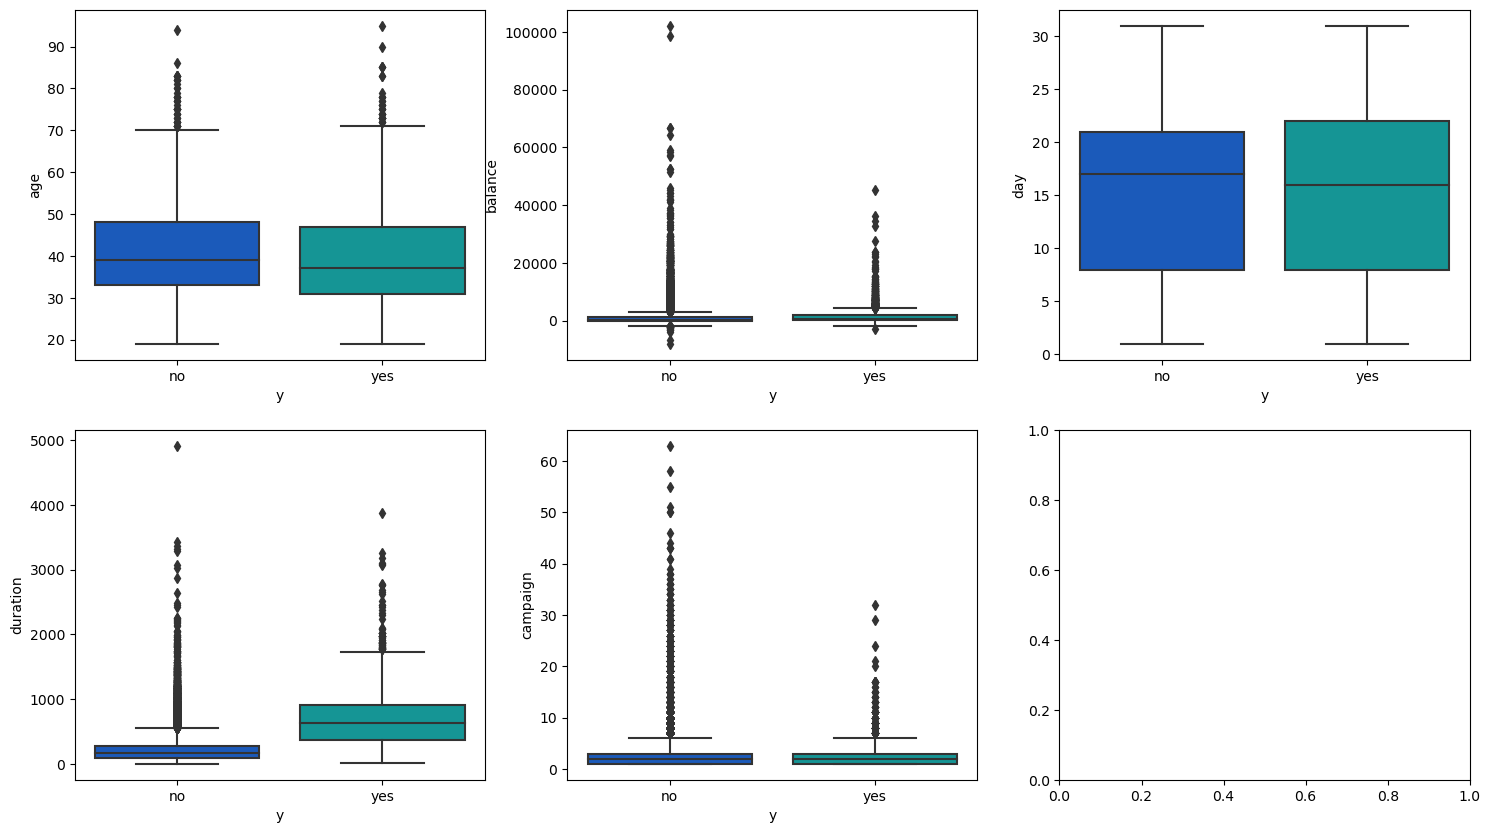

<Figure size 640x480 with 0 Axes>

In [9]:
fig, axes = plt.subplots(2,3,figsize=(18, 10))
sns.boxplot(ax = axes[0,0],data = deposit, x = 'y', y = 'age', palette = 'winter')
sns.boxplot(ax = axes[0,1],data = deposit, x = 'y', y = 'balance', palette = 'winter')
sns.boxplot(ax = axes[0,2],data = deposit, x = 'y', y = 'day', palette = 'winter')
sns.boxplot(ax = axes[1,0],data = deposit, x = 'y', y = 'duration', palette = 'winter')
sns.boxplot(ax = axes[1,1],data = deposit, x = 'y', y = 'campaign', palette = 'winter')
plt.show()
plt.clf()

Based on these boxplots; it can be noticed that there is a lot of overlapping between the boxes most of the variables based on the target variableo outcomes. It may not exist any association between the variables at all. There are a lot of outliers for most of the variables, and the ``balance`` variable has some negative values that indicates that clients might owe money.  

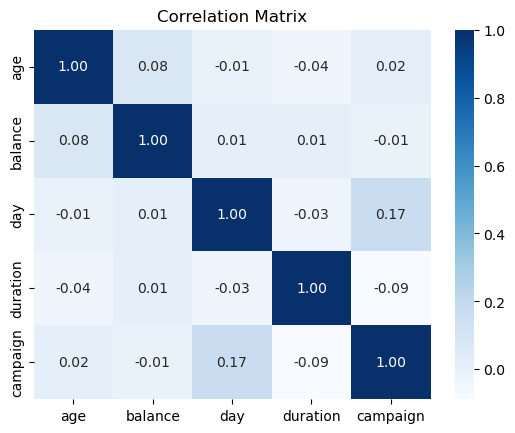

<Figure size 640x480 with 0 Axes>

In [10]:
corr_matrix = deposit[['age', 'balance', 'day', 'duration', 'campaign']].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'Blues', fmt = ".2f")
plt.title('Correlation Matrix')
plt.show()
plt.clf()

The correlation matrix is very helpful to determine how numerical variables are correlated with each other. Based on this heatmap, it can be noticed that there is a weak positive correlation between most of the variables, and variables such as ``balance``, ``day``, and ``duration`` have weak negative correlation with some of the remaining variables or have no correlation at all due to their closeness to 0.

## Imbalance Challenge
In this step, the dataset needs to be balanced before training any robust machine learning system since there can be a lot of bias, and the system might perform poorly on the minority class.<br> Based on the explanatory data analysis performed, it can be noticed that there is an imbalance due to the proportion of the clients that did not subscribe to a term deposit (92.8%) overweights the clients that did (7.2%). The methods considered for this imabalance challenge are *Random Undersampling*, *Synthetic Minority Over-sampling Technique (SMOTE)*, *Sythetic Minority Over-sampling Technique and Edited Nearest Neighbor (SMOTE-ENN)*, and *Sythetic Minority Over-sampling Technique and Tomek links (SMOTE-Tomek)*.

### Random Undersampling
This method randomly decreases the number of majority class sample (non-subscribers) until there is some balance between both classes. Notice that the data set is one-hot encoded to replace categorical variables with dummy variables, and this dataset is split into training and test data with sizes of 80% and 20%, respectively.

In [11]:
import random 
#seed = random.randint(1000,9999) 
seed = 1742
print(seed)

1742


In [12]:
from imblearn.under_sampling import RandomUnderSampler
X = deposit.drop(['y'],axis = 1)
X['month'].replace({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11
                    , 'dec':12},inplace = True)

#Use One-Hot Encoding for dummy variables
X = pd.get_dummies(data = X, columns = ['job','marital','education','default','housing','loan','contact'])

deposit.y.replace({'no':0, 'yes':1},inplace = True)
y = deposit.y

# Split training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .20, random_state = seed)

# Define the undersampling method
under_sampler = RandomUnderSampler(random_state=seed)

# Apply the undersampling method
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)
y_resampled.value_counts()

0    2354
1    2354
Name: y, dtype: int64

In [13]:
X_resampled.head()

,age,balance,day,month,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,...,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown
27264,34,7384,21,11,69,2,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
23399,50,376,27,8,142,3,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
22216,60,1446,21,8,283,6,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
11969,43,819,20,6,285,4,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
39732,26,2506,28,5,210,2,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0


### Synthetic Minority Over-sampling Technique (SMOTE)
Based on the training data, this method generates synthetic samples of the minority class (subscribers) to balance the dataset and reduce overfitting.

In [14]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = seed)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
y_train_resampled.value_counts()

0    29646
1    29646
Name: y, dtype: int64

In [15]:
X_train_resampled.head()

,age,balance,day,month,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,...,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown
0,31,817,17,4,160,1,0,1,0,0,...,0,1,0,0,1,1,0,1,0,0
1,33,39,16,7,332,3,0,0,0,1,...,0,1,0,0,1,1,0,1,0,0
2,42,10907,4,5,74,3,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
3,41,349,27,2,48,1,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
4,31,3007,9,5,283,1,0,1,0,0,...,0,1,0,0,1,1,0,0,0,1


### SMOTE-ENN
This sampling technique combines over- and under- sampling using SMOTE and Edited Nearest Neighbors. It is used to clean the data by removing any misclassified samples by their nearest neighbors.

In [16]:
from imblearn.combine import SMOTEENN
smtnn = SMOTEENN(random_state = seed)
X_train_nn, y_train_nn = smtnn.fit_resample(X_train, y_train)
y_train_nn.value_counts()

1    26237
0    21943
Name: y, dtype: int64

In [17]:
X_train_nn.head()

,age,balance,day,month,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,...,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown
0,33,39,16,7,332,3,0,0,0,1,...,0,1,0,0,1,1,0,1,0,0
1,41,349,27,2,48,1,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
2,31,3007,9,5,283,1,0,1,0,0,...,0,1,0,0,1,1,0,0,0,1
3,30,4,29,7,176,21,1,0,0,0,...,1,1,0,0,1,1,0,1,0,0
4,28,2257,15,5,352,1,0,1,0,0,...,0,1,0,0,1,1,0,1,0,0


### SMOTE-Tomek
This technique combines SMOTE with TOMEK links; pairs of very close instances. It reduces overlap between classes and improves their separability

In [18]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state = seed)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)
y_train_smt.value_counts()

0    29065
1    29065
Name: y, dtype: int64

In [19]:
X_train_smt.head()

,age,balance,day,month,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,...,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown
0,31,817,17,4,160,1,0,1,0,0,...,0,1,0,0,1,1,0,1,0,0
1,33,39,16,7,332,3,0,0,0,1,...,0,1,0,0,1,1,0,1,0,0
2,42,10907,4,5,74,3,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
3,41,349,27,2,48,1,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
4,31,3007,9,5,283,1,0,1,0,0,...,0,1,0,0,1,1,0,0,0,1


Based on the results above, the four balancing methods created four different balanced training datasets that will be considered to determine whether or not a client will subscribe to a term deposit.

## Term Deposit Prediction
In this step, the subscription of the customer to a term deposit will be predicted. This will be broken down into two different stages: Before calls and After calls.

### Stage 1: Before Calls
In order to predict the customer's interest in a term deposit based on their profile, the related features ``day`` ,``month``, ``duration``, ``campaign``, and ``contact`` need to be excluded for model implementation. The four balanced datasets obtained from previous step will be considered. The models implemented are *Pycaret compare models* and *TPOT models*.

### Pycaret Compare Models
There will be an implementation of different Pycaret compare models to predict if a customer will be interested in subscribing to a term deposit or not. The focus is on recall for the subscribers (minority class); the models need to be good at identifying as many positive cases as possible. 

In [20]:
from pycaret.classification import *
data_resampled_1 = pd.concat([X_resampled,y_resampled], axis = 1)
clf_usmp_1 = setup(data_resampled_1,target = 'y', session_id = seed,
                   ignore_features = ['day','month','duration','campaign',
                                      'contact_cellular','contact_telephone','contact_unknown'])
best_usmp_1 = compare_models()
best_usmp_1

,Description,Value
0,Session id,1742
1,Target,y
2,Target type,Binary
3,Original data shape,"(4708, 35)"
4,Transformed data shape,"(4708, 28)"
5,Transformed train set shape,"(3295, 28)"
6,Transformed test set shape,"(1413, 28)"
7,Ignore features,7
8,Numeric features,27
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5772,0.6034,0.5352,0.5860,0.5585,0.1545,0.1557,0.9060
lda,Linear Discriminant Analysis,0.5727,0.6015,0.5279,0.5812,0.5524,0.1454,0.1465,0.0110
ridge,Ridge Classifier,0.5721,0.6012,0.5273,0.5806,0.5518,0.1442,0.1453,0.0090
nb,Naive Bayes,0.5681,0.5953,0.4666,0.5863,0.5174,0.1363,0.1399,0.0090
gbc,Gradient Boosting Classifier,0.5636,0.5898,0.5036,0.5731,0.5354,0.1272,0.1284,0.1190
ada,Ada Boost Classifier,0.5630,0.5951,0.5090,0.5718,0.5374,0.1259,0.1272,0.0510
lightgbm,Light Gradient Boosting Machine,0.5602,0.5784,0.5363,0.5633,0.5490,0.1204,0.1208,0.6320
rf,Random Forest Classifier,0.5399,0.5652,0.5333,0.5405,0.5366,0.0798,0.0798,0.1440
et,Extra Trees Classifier,0.5359,0.5566,0.5212,0.5373,0.5289,0.0719,0.0720,0.1410
qda,Quadratic Discriminant Analysis,0.5329,0.5880,0.1402,0.6491,0.2295,0.0661,0.1049,0.0120


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1742, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
data_smote_1 = pd.concat([X_train_resampled,y_train_resampled], axis = 1)
clf_smote_1 = setup(data_smote_1,target = 'y', session_id = seed,
                    ignore_features = ['day','month','duration','campaign',
                                      'contact_cellular','contact_telephone','contact_unknown'])
best_smote_1 = compare_models()
best_smote_1

,Description,Value
0,Session id,1742
1,Target,y
2,Target type,Binary
3,Original data shape,"(59292, 35)"
4,Transformed data shape,"(59292, 28)"
5,Transformed train set shape,"(41504, 28)"
6,Transformed test set shape,"(17788, 28)"
7,Ignore features,7
8,Numeric features,27
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9518,0.9691,0.9065,0.9969,0.9495,0.9036,0.9074,0.8510
xgboost,Extreme Gradient Boosting,0.9514,0.9683,0.9077,0.9947,0.9492,0.9028,0.9063,0.1760
qda,Quadratic Discriminant Analysis,0.9499,0.9569,0.8998,1.0000,0.9472,0.8998,0.9043,0.0510
lr,Logistic Regression,0.9477,0.9588,0.8958,0.9996,0.9448,0.8954,0.9003,1.0740
ada,Ada Boost Classifier,0.9474,0.9631,0.8962,0.9984,0.9446,0.8948,0.8996,0.4180
rf,Random Forest Classifier,0.9473,0.9696,0.9229,0.9701,0.9459,0.8945,0.8956,0.8130
gbc,Gradient Boosting Classifier,0.9388,0.9633,0.8812,0.9960,0.9350,0.8776,0.8835,1.1960
et,Extra Trees Classifier,0.9371,0.9642,0.9235,0.9494,0.9362,0.8742,0.8745,0.7910
dt,Decision Tree Classifier,0.9230,0.9234,0.9264,0.9202,0.9232,0.8459,0.8460,0.0570
ridge,Ridge Classifier,0.9146,0.9614,0.8292,1.0000,0.9066,0.8292,0.8416,0.0340


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1742, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [22]:
data_smoteenn_1 = pd.concat([X_train_nn,y_train_nn], axis = 1)
clf_smoteenn_1 = setup(data_smoteenn_1,target = 'y', session_id = seed,
                       ignore_features = ['day','month','duration','campaign',
                                      'contact_cellular','contact_telephone','contact_unknown'])
best_smoteenn_1 = compare_models()
best_smoteenn_1

,Description,Value
0,Session id,1742
1,Target,y
2,Target type,Binary
3,Original data shape,"(48180, 35)"
4,Transformed data shape,"(48180, 28)"
5,Transformed train set shape,"(33726, 28)"
6,Transformed test set shape,"(14454, 28)"
7,Ignore features,7
8,Numeric features,27
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9456,0.9671,0.9036,0.9960,0.9476,0.8912,0.8958,0.7280
xgboost,Extreme Gradient Boosting,0.9451,0.9664,0.9057,0.9928,0.9473,0.8903,0.8944,0.1790
qda,Quadratic Discriminant Analysis,0.9435,0.9557,0.8963,1.0000,0.9453,0.8873,0.8930,0.0380
ada,Ada Boost Classifier,0.9410,0.9612,0.8931,0.9984,0.9428,0.8823,0.8881,0.3120
lr,Logistic Regression,0.9408,0.9583,0.8922,0.9990,0.9426,0.8819,0.8879,0.8280
rf,Random Forest Classifier,0.9398,0.9667,0.9209,0.9670,0.9434,0.8792,0.8804,0.6370
gbc,Gradient Boosting Classifier,0.9387,0.9628,0.8911,0.9959,0.9406,0.8777,0.8835,0.9330
et,Extra Trees Classifier,0.9299,0.9617,0.9208,0.9491,0.9347,0.8592,0.8597,0.5610
dt,Decision Tree Classifier,0.9129,0.9121,0.9260,0.9151,0.9205,0.8241,0.8242,0.0390
ridge,Ridge Classifier,0.9090,0.9596,0.8331,0.9998,0.9089,0.8196,0.8332,0.0240


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1742, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [23]:
data_smotetomek_1 = pd.concat([X_train_smt,y_train_smt], axis = 1)
clf_smotetomek_1 = setup(data_smotetomek_1,target = 'y', session_id = seed,
                         ignore_features = ['day','month','duration','campaign',
                                      'contact_cellular','contact_telephone','contact_unknown'])
best_smotetomek_1 = compare_models()
best_smotetomek_1

,Description,Value
0,Session id,1742
1,Target,y
2,Target type,Binary
3,Original data shape,"(58130, 35)"
4,Transformed data shape,"(58130, 28)"
5,Transformed train set shape,"(40691, 28)"
6,Transformed test set shape,"(17439, 28)"
7,Ignore features,7
8,Numeric features,27
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9510,0.9684,0.9042,0.9975,0.9485,0.9019,0.9059,0.7730
xgboost,Extreme Gradient Boosting,0.9509,0.9672,0.9068,0.9947,0.9487,0.9019,0.9055,0.1750
qda,Quadratic Discriminant Analysis,0.9494,0.9564,0.8988,1.0000,0.9467,0.8988,0.9035,0.0470
lr,Logistic Regression,0.9479,0.9594,0.8960,0.9998,0.9450,0.8958,0.9006,1.0450
rf,Random Forest Classifier,0.9473,0.9685,0.9227,0.9704,0.9459,0.8946,0.8957,0.7980
ada,Ada Boost Classifier,0.9464,0.9618,0.8942,0.9985,0.9434,0.8928,0.8977,0.4370
gbc,Gradient Boosting Classifier,0.9378,0.9622,0.8785,0.9968,0.9338,0.8756,0.8819,1.0900
et,Extra Trees Classifier,0.9366,0.9628,0.9227,0.9490,0.9357,0.8731,0.8735,0.7640
dt,Decision Tree Classifier,0.9186,0.9191,0.9244,0.9138,0.9191,0.8372,0.8373,0.0740
ridge,Ridge Classifier,0.9154,0.9604,0.8308,1.0000,0.9075,0.8308,0.8430,0.0310


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1742, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

Based on the results above, it can be noticed that *Pycaret Compare models* yielded some very significant results obtained from the 4 different training datasets. However, it also happens to notice that the trained models from the *SMOTE-Tomek* balancing method yielded significant results for the Recall of the term deposit subscribers.

### XGBoost Model and Optuna
XGBoost (Extreme Gradient Boosting) is a popular machine learning algorithm designed for both classification and regression tasks. It is an optimized implementation of gradient boosting, which is a type of ensemble learning method that combines the predictions of multiple base learners (usually decision trees) to improve accuracy and robustness.<br>
Using Optuna to optimize hyperparameters for an XGBoost model is a great approach for finding the best model configuration. Optuna is a powerful hyperparameter optimization library that uses Bayesian optimization to search for the optimal set of hyperparameters. The training dataset obtained from the *SMOTE-Tomek* balancing method will be used for the model implementation.

In [24]:
import optuna
import xgboost as xgb
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

X_train_smotetomek_1 = data_smotetomek_1.drop(['day','month','duration','campaign',
                                      'contact_cellular','contact_telephone','contact_unknown', 'y'], axis = 1)

X_test_1 = X_test.drop(['day','month','duration','campaign',
                                      'contact_cellular','contact_telephone','contact_unknown'], axis = 1)

np.random.seed(seed)
# Define the objective function
def objective(trial):
    # Hyperparameters to tune
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'random_state': seed,
        'use_label_encoder': False,
        'n_estimators': trial.suggest_int('n_estimators', 1, 28),
        'max_depth': trial.suggest_int('max_depth', 1e-8, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
        'subsample': trial.suggest_float('subsample', 1e-8, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 1e-8, 1.0),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
        "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0)
    }
    
    # Create the model
    model = xgb.XGBClassifier(**param)
    
    # Fit the model
    model.fit(X_train_smotetomek_1, y_train_smt)
    
    # Make predictions
    preds = model.predict(X_test_1)
    
    # Return the accuracy score
    return recall_score(y_test, preds)

In [25]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)  

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)
print('Best recall:', study.best_value)

[I 2024-10-27 14:50:14,922] A new study created in memory with name: no-name-c23e4ced-ffc8-49af-8839-dd12c0748d0d
[I 2024-10-27 14:50:15,122] Trial 0 finished with value: 0.2140221402214022 and parameters: {'n_estimators': 27, 'max_depth': 7, 'learning_rate': 0.017523640016712774, 'subsample': 0.1735815887182121, 'colsample_bytree': 0.1545218494734482, 'gamma': 0.3065103009266325, 'lambda': 0.09876714594928993, 'alpha': 6.463457494500022e-07}. Best is trial 0 with value: 0.2140221402214022.
[I 2024-10-27 14:50:15,268] Trial 1 finished with value: 0.0996309963099631 and parameters: {'n_estimators': 8, 'max_depth': 6, 'learning_rate': 0.016870885863193404, 'subsample': 0.02309778179307056, 'colsample_bytree': 0.5879187922632091, 'gamma': 0.4736150477868258, 'lambda': 2.032447395895486e-05, 'alpha': 2.8996974885649724e-06}. Best is trial 0 with value: 0.2140221402214022.
[I 2024-10-27 14:50:15,377] Trial 2 finished with value: 0.07564575645756458 and parameters: {'n_estimators': 2, 'max_d

Best hyperparameters: {'n_estimators': 1, 'max_depth': 1, 'learning_rate': 0.046743990831732446, 'subsample': 0.2330372512794289, 'colsample_bytree': 0.06376936167382267, 'gamma': 0.7700135629278888, 'lambda': 0.0017957025184846842, 'alpha': 2.0970961151772863e-06}
Best recall: 0.8542435424354243


In [26]:
# Train the final model with the best hyperparameters
best_params = study.best_params
final_model = xgb.XGBClassifier(**best_params, use_label_encoder=False,random_state = seed)
final_model.fit(X_train_smotetomek_1, y_train_smt)

# Evaluate the model on the original test set
y_pred = final_model.predict(X_test_1)
recall = recall_score(y_test, y_pred, pos_label=1)  # Recall for class 1 (subscribers)
print("Recall score on test set: ", recall)

Recall score on test set:  0.8542435424354243


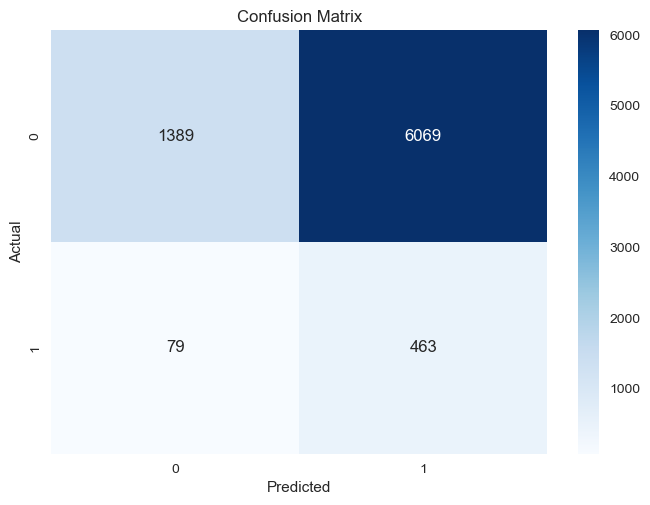

<Figure size 800x550 with 0 Axes>

In [27]:
conf_mtx_xgb = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(conf_mtx_xgb), annot = True, cmap = 'Blues',fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.clf()

In [28]:
from sklearn.metrics import roc_auc_score
# Evaluate the model
names = ['non-subscribers', 'subscribers']
print(classification_report(y_test,y_pred, target_names = names))

                 precision    recall  f1-score   support

non-subscribers       0.95      0.19      0.31      7458
    subscribers       0.07      0.85      0.13       542

       accuracy                           0.23      8000
      macro avg       0.51      0.52      0.22      8000
   weighted avg       0.89      0.23      0.30      8000



Based on the outputs above, it happens to notice that the XGBoost Model implemented yielded significant recall results. The model correctly identifies more than 80% of the actual positive cases (subscribers). However, this might be improved by training a stochastic gradient descent model.

### Stochastic Gradient Descent
Stochastic Gradient Descent (SGD) is an optimization technique used in machine learning to minimize errors in predictive models. Unlike regular gradient descent, SGD updates the parameters using only one data point at a time. 

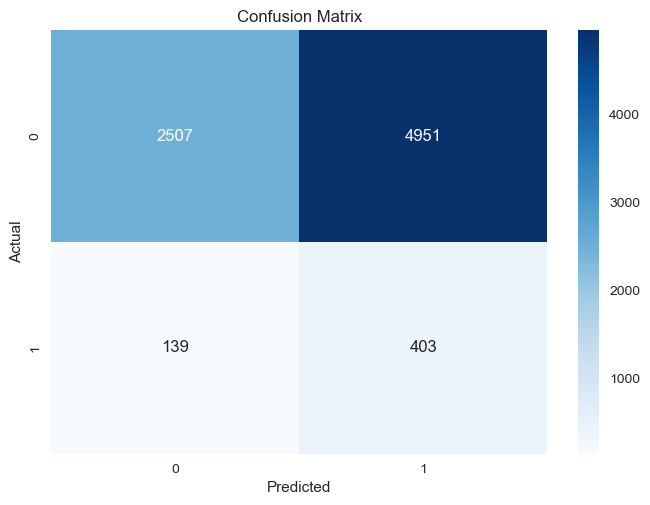

<Figure size 800x550 with 0 Axes>

In [29]:
from sklearn.linear_model import SGDClassifier

# Initialize the SGDClassifier
sgd_model = SGDClassifier(loss='log_loss', random_state=1742)

# Fit the model on the SMOTE-Tomek data
sgd_model.fit(X_train_smotetomek_1, y_train_smt)

# Make predictions on the original test data
predictions_sgd = sgd_model.predict(X_test_1)

# Evaluate the model
conf_mtx_xgb = metrics.confusion_matrix(y_test, predictions_sgd)
sns.heatmap(pd.DataFrame(conf_mtx_xgb), annot = True, cmap = 'Blues',fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.clf()

In [30]:
print(classification_report(y_test, predictions_sgd,target_names = names))

                 precision    recall  f1-score   support

non-subscribers       0.95      0.34      0.50      7458
    subscribers       0.08      0.74      0.14       542

       accuracy                           0.36      8000
      macro avg       0.51      0.54      0.32      8000
   weighted avg       0.89      0.36      0.47      8000



Based on the outputs above, it can be noticed that the recall score for the subscribers is statistically significant, but it correctly identifies more than 70% of the actual positive cases (subscribers).

### TPOT Models 
TPOT (*Tree-based Pipeline Optimization Tool*) is a powerful tool for automated machine learning (*AutoML*) that uses genetic algorithms to optimize machine learning pipelines. It can automate the process of feature selection, model selection, and hyperparameter tuning, which can be very helpful in building robust models efficiently.

In [31]:
from tpot import TPOTClassifier

# Initialize TPOTClassifier
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=20, random_state=seed, cv = 5)

# Fit TPOT to your data
X_train_1 = data_resampled_1.drop(['day','month','duration','campaign',
                                      'contact_cellular','contact_telephone','contact_unknown','y'], axis = 1)

tpot.fit(X_train_1, data_resampled_1.y)

# Make predictions
y_pred_tpot = tpot.predict(X_test_1)

# Evaluate the model
print(classification_report(y_test, y_pred_tpot, target_names = names))

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.5800765323965335

Generation 2 - Current best internal CV score: 0.583476041885242

Generation 3 - Current best internal CV score: 0.583476041885242

Generation 4 - Current best internal CV score: 0.5860233613335409

Generation 5 - Current best internal CV score: 0.5860233613335409

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.15000000000000002, min_samples_leaf=16, min_samples_split=3, n_estimators=100)
                 precision    recall  f1-score   support

non-subscribers       0.95      0.63      0.76      7458
    subscribers       0.09      0.53      0.16       542

       accuracy                           0.63      8000
      macro avg       0.52      0.58      0.46      8000
   weighted avg       0.89      0.63      0.72      8000



In [32]:
# Initialize TPOTClassifier
tpot_smote = TPOTClassifier(verbosity=2, generations=5, population_size=20, random_state=seed, cv = 5)

# Fit TPOT to your data
X_train_smote_1 = data_smote_1.drop(['day','month','duration','campaign',
                                      'contact_cellular','contact_telephone','contact_unknown', 'y'], axis = 1)
tpot_smote.fit(X_train_smote_1, data_smote_1.y)

# Make predictions
y_pred_tpot_smote = tpot_smote.predict(X_test_1)

# Evaluate the model
print(classification_report(y_test, y_pred_tpot_smote, target_names = names))

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9514118619079177

Generation 2 - Current best internal CV score: 0.9514118619079177

Generation 3 - Current best internal CV score: 0.9518335153292657

Generation 4 - Current best internal CV score: 0.9518335153292657

Generation 5 - Current best internal CV score: 0.9518840657252714

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.8500000000000001, min_samples_leaf=4, min_samples_split=4, n_estimators=100)
                 precision    recall  f1-score   support

non-subscribers       0.93      0.99      0.96      7458
    subscribers       0.13      0.02      0.03       542

       accuracy                           0.92      8000
      macro avg       0.53      0.51      0.50      8000
   weighted avg       0.88      0.92      0.90      8000



In [33]:
# Initialize TPOTClassifier
tpot_smoteenn = TPOTClassifier(verbosity=2, generations=5, population_size=20, random_state=seed, cv = 5)

# Fit TPOT to your data
X_train_smoteenn_1 = data_smoteenn_1.drop(['day','month','duration','campaign',
                                      'contact_cellular','contact_telephone','contact_unknown', 'y'], axis = 1)
tpot_smoteenn.fit(X_train_smoteenn_1, data_smoteenn_1.y)

# Make predictions
y_pred_tpot_smoteenn = tpot_smoteenn.predict(X_test_1)

# Evaluate the model
print(classification_report(y_test, y_pred_tpot_smoteenn, target_names = names))

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9437318389373184

Generation 2 - Current best internal CV score: 0.9437318389373184

Generation 3 - Current best internal CV score: 0.9438148609381486

Generation 4 - Current best internal CV score: 0.9471564964715649

Generation 5 - Current best internal CV score: 0.9472187629721877

Best pipeline: RandomForestClassifier(GaussianNB(MinMaxScaler(input_matrix)), bootstrap=True, criterion=entropy, max_features=0.9500000000000001, min_samples_leaf=5, min_samples_split=3, n_estimators=100)
                 precision    recall  f1-score   support

non-subscribers       0.93      0.99      0.96      7458
    subscribers       0.19      0.03      0.05       542

       accuracy                           0.93      8000
      macro avg       0.56      0.51      0.50      8000
   weighted avg       0.88      0.93      0.90      8000



In [34]:
# Initialize TPOTClassifier
tpot_smotetomek = TPOTClassifier(verbosity=2, generations=5, population_size=20, random_state=seed, cv = 5)

# Fit TPOT to your data
X_train_smotetomek_1 = data_smotetomek_1.drop(['day','month','duration','campaign',
                                      'contact_cellular','contact_telephone','contact_unknown', 'y'], axis = 1)
tpot_smotetomek.fit(X_train_smotetomek_1, data_smotetomek_1.y)

# Make predictions
y_pred_tpot_smotetomek = tpot_smotetomek.predict(X_test_1)

# Evaluate the model
print(classification_report(y_test, y_pred_tpot_smotetomek, target_names = names))

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9504902804059865

Generation 2 - Current best internal CV score: 0.9507999311887149

Generation 3 - Current best internal CV score: 0.9523997935661448

Generation 4 - Current best internal CV score: 0.9523997935661448

Generation 5 - Current best internal CV score: 0.9524514020299331

Best pipeline: RandomForestClassifier(MaxAbsScaler(ZeroCount(input_matrix)), bootstrap=True, criterion=gini, max_features=0.25, min_samples_leaf=4, min_samples_split=15, n_estimators=100)
                 precision    recall  f1-score   support

non-subscribers       0.93      1.00      0.96      7458
    subscribers       0.31      0.01      0.03       542

       accuracy                           0.93      8000
      macro avg       0.62      0.51      0.50      8000
   weighted avg       0.89      0.93      0.90      8000



Based on the results above, the TPOT models implemented for the 4 training datasets seem to overfit the data; the results of the recall metric for both classes do not seem very significant. 

### Best Performing Model
In this step, the best performing model (XGBoost) will be used to predict the entire dataset (40,000 records). The results will be helpful to determine the effectiveness of the model by determining the saved duration time for the calls made to potential subscribers.

In [35]:
#Exclude features from the original data
X_1 = X.drop(['day','month','duration','campaign','contact_cellular','contact_telephone','contact_unknown'],
            axis = 1)
X_1.shape

(40000, 27)

In [36]:
# Ensure the model has the same feature columns as during training
X_1 = X_1.reindex(columns=X_train_1.columns, fill_value=0)

#Get predictions
y_pred_fs = final_model.predict(X_1)

#Total duration for subscribers
X['subscriptions'] = y_pred_fs
total_duration = X[X['subscriptions'] == 1]['duration'].sum()
original_duration = deposit['duration'].sum()
print(f"Total duration for predicted subscribers: {total_duration} seconds")
print(f"Total duration for the entire dataset: {original_duration} seconds")

time_saved = original_duration - total_duration
print(f"Time that can potentially be saved: {time_saved} seconds")

Total duration for predicted subscribers: 8442555 seconds
Total duration for the entire dataset: 10192972 seconds
Time that can potentially be saved: 1750417 seconds


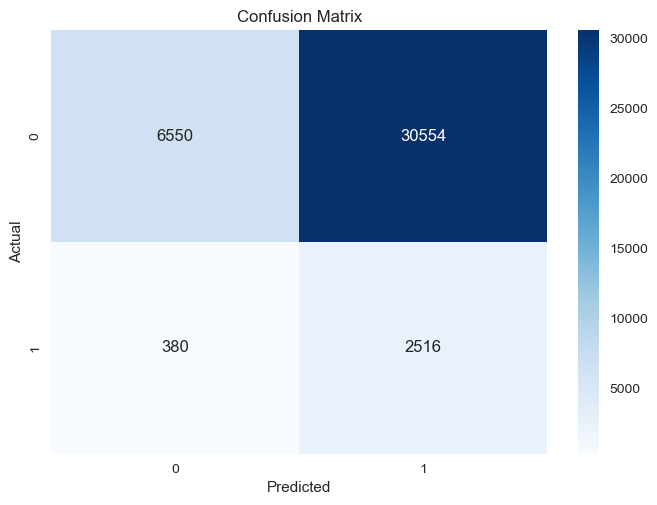

<Figure size 800x550 with 0 Axes>

In [37]:
conf_mtx_xgb_fs = metrics.confusion_matrix(deposit.y,y_pred_fs)
sns.heatmap(pd.DataFrame(conf_mtx_xgb_fs), annot = True, cmap = 'Blues',fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.clf()

In [38]:
print(classification_report(deposit.y, y_pred_fs,target_names = names))

                 precision    recall  f1-score   support

non-subscribers       0.95      0.18      0.30     37104
    subscribers       0.08      0.87      0.14      2896

       accuracy                           0.23     40000
      macro avg       0.51      0.52      0.22     40000
   weighted avg       0.88      0.23      0.29     40000



Based on the outputs above, it can be noticed that the XGBoost model's performance yielded significant results:
- The duration time that can potentially be saved is 1,750,417 seconds (29,173.62 minutes)
- The recall score for class 1 is 0.87, which means that the model correctly identifies 87% of the actual positive cases (subscribers)
- The duration time that can potentially be saved at the cost of losing around 13% of the subscriptions is about 486.23 hours (20.25 days).

This model works very effectively identifying potential term deposit subscribers before making calls, and it saves a lot of human effort as well.

### Stage 2: After Calls
In this stage, the calls have been made already; now every single feature of the datasets is considered to develop a robust machine learning system. The focus will be on  precision for the subscribers.

In [39]:
clf_usmp_2 = setup(data_resampled_1,target = 'y', session_id = seed)
best_usmp_2 = compare_models()
best_usmp_2

,Description,Value
0,Session id,1742
1,Target,y
2,Target type,Binary
3,Original data shape,"(4708, 35)"
4,Transformed data shape,"(4708, 35)"
5,Transformed train set shape,"(3295, 35)"
6,Transformed test set shape,"(1413, 35)"
7,Numeric features,34
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8765,0.9356,0.9060,0.8558,0.8801,0.7529,0.7544,0.9800
xgboost,Extreme Gradient Boosting,0.8750,0.9313,0.8987,0.8584,0.8778,0.7499,0.7512,0.0740
gbc,Gradient Boosting Classifier,0.8716,0.9328,0.8974,0.8542,0.8750,0.7432,0.7447,0.1870
rf,Random Forest Classifier,0.8686,0.9272,0.9017,0.8468,0.8730,0.7371,0.7394,0.1310
ada,Ada Boost Classifier,0.8376,0.9104,0.8307,0.8429,0.8365,0.6752,0.6757,0.1400
et,Extra Trees Classifier,0.8276,0.8988,0.8246,0.8302,0.8269,0.6552,0.6561,0.1130
lr,Logistic Regression,0.8215,0.9045,0.8016,0.8364,0.8181,0.6431,0.6443,1.0350
dt,Decision Tree Classifier,0.8161,0.8161,0.8058,0.8232,0.8137,0.6322,0.6333,0.0140
ridge,Ridge Classifier,0.8088,0.8997,0.7482,0.8527,0.7966,0.6176,0.6228,0.0100
lda,Linear Discriminant Analysis,0.8082,0.8996,0.7476,0.8520,0.7959,0.6164,0.6216,0.0130


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1742, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [40]:
clf_smote_2 = setup(data_smote_1,target = 'y', session_id = seed)
best_smote_2 = compare_models()
best_smote_2

,Description,Value
0,Session id,1742
1,Target,y
2,Target type,Binary
3,Original data shape,"(59292, 35)"
4,Transformed data shape,"(59292, 35)"
5,Transformed train set shape,"(41504, 35)"
6,Transformed test set shape,"(17788, 35)"
7,Numeric features,34
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9644,0.9952,0.9572,0.9713,0.9642,0.9288,0.9289,0.3010
rf,Random Forest Classifier,0.9638,0.9951,0.9525,0.9745,0.9634,0.9276,0.9278,1.0700
et,Extra Trees Classifier,0.9628,0.9925,0.9382,0.9868,0.9619,0.9256,0.9268,0.9260
lightgbm,Light Gradient Boosting Machine,0.9625,0.9955,0.9540,0.9704,0.9621,0.9249,0.9251,1.3880
qda,Quadratic Discriminant Analysis,0.9530,0.9654,0.9059,1.0000,0.9506,0.9059,0.9100,0.0700
gbc,Gradient Boosting Classifier,0.9517,0.9919,0.9469,0.9561,0.9515,0.9034,0.9035,1.8070
lr,Logistic Regression,0.9459,0.9833,0.9247,0.9655,0.9447,0.8917,0.8925,1.2320
ada,Ada Boost Classifier,0.9456,0.9897,0.9353,0.9550,0.9450,0.8912,0.8914,0.6310
dt,Decision Tree Classifier,0.9429,0.9429,0.9493,0.9374,0.9433,0.8858,0.8859,0.0870
ridge,Ridge Classifier,0.9298,0.9867,0.8618,0.9974,0.9246,0.8596,0.8677,0.0410


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [41]:
clf_smoteenn_2 = setup(data_smoteenn_1,target = 'y', session_id = seed)
best_smoteenn_2 = compare_models()
best_smoteenn_2

,Description,Value
0,Session id,1742
1,Target,y
2,Target type,Binary
3,Original data shape,"(48180, 35)"
4,Transformed data shape,"(48180, 35)"
5,Transformed train set shape,"(33726, 35)"
6,Transformed test set shape,"(14454, 35)"
7,Numeric features,34
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9805,0.9982,0.9795,0.9847,0.9821,0.9607,0.9608,0.1850
lightgbm,Light Gradient Boosting Machine,0.9793,0.9982,0.9784,0.9835,0.9809,0.9583,0.9583,1.2930
rf,Random Forest Classifier,0.9792,0.9980,0.9787,0.9831,0.9808,0.9581,0.9581,0.6870
et,Extra Trees Classifier,0.9735,0.9964,0.9597,0.9914,0.9753,0.9468,0.9474,0.5820
gbc,Gradient Boosting Classifier,0.9693,0.9958,0.9689,0.9746,0.9717,0.9381,0.9381,1.3940
knn,K Neighbors Classifier,0.9682,0.9940,0.9887,0.9546,0.9713,0.9357,0.9364,0.8050
ada,Ada Boost Classifier,0.9679,0.9955,0.9634,0.9774,0.9703,0.9354,0.9356,0.4080
dt,Decision Tree Classifier,0.9636,0.9630,0.9701,0.9634,0.9667,0.9265,0.9266,0.0820
lr,Logistic Regression,0.9624,0.9926,0.9557,0.9748,0.9651,0.9243,0.9246,0.9740
qda,Quadratic Discriminant Analysis,0.9470,0.9721,0.9026,1.0000,0.9488,0.8941,0.8991,0.0550


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [42]:
clf_smotetomek_2 = setup(data_smotetomek_1,target = 'y', session_id = seed)
best_smotetomek_2 = compare_models()
best_smotetomek_2

,Description,Value
0,Session id,1742
1,Target,y
2,Target type,Binary
3,Original data shape,"(58130, 35)"
4,Transformed data shape,"(58130, 35)"
5,Transformed train set shape,"(40691, 35)"
6,Transformed test set shape,"(17439, 35)"
7,Numeric features,34
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9653,0.9955,0.9548,0.9752,0.9649,0.9305,0.9308,0.9430
xgboost,Extreme Gradient Boosting,0.9641,0.9953,0.9586,0.9693,0.9639,0.9282,0.9283,0.2230
lightgbm,Light Gradient Boosting Machine,0.9640,0.9956,0.9571,0.9706,0.9638,0.9281,0.9282,1.2360
et,Extra Trees Classifier,0.9625,0.9928,0.9381,0.9863,0.9616,0.9250,0.9261,0.7820
qda,Quadratic Discriminant Analysis,0.9526,0.9660,0.9052,1.0000,0.9502,0.9052,0.9093,0.0620
gbc,Gradient Boosting Classifier,0.9516,0.9920,0.9481,0.9548,0.9514,0.9032,0.9032,1.6930
ada,Ada Boost Classifier,0.9470,0.9898,0.9357,0.9574,0.9464,0.8941,0.8944,0.5630
lr,Logistic Regression,0.9464,0.9841,0.9260,0.9654,0.9453,0.8928,0.8936,1.1570
dt,Decision Tree Classifier,0.9459,0.9459,0.9522,0.9404,0.9463,0.8919,0.8919,0.0780
ridge,Ridge Classifier,0.9307,0.9872,0.8635,0.9976,0.9257,0.8614,0.8693,0.0420


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=1742, verbose=0,
                       warm_start=False)

In [43]:
from sklearn.metrics import precision_score
# Define the objective function
def objective_2(trial):
    # Hyperparameters to tune
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'random_state': seed,
        'use_label_encoder': False,
        'n_estimators': trial.suggest_int('n_estimators', 1, 35),
        'max_depth': trial.suggest_int('max_depth', 1e-8, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
        'subsample': trial.suggest_float('subsample', 1e-8, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 1e-8, 1.0),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
        "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0)
    }
    
    # Create the model
    model = xgb.XGBClassifier(**param)
    
    # Fit the model
    model.fit(X_resampled,y_resampled)
    
    # Make predictions
    preds = model.predict(X_test)
    
    # Return the accuracy score
    return precision_score(y_test, preds)

In [44]:
study_2 = optuna.create_study(direction='maximize')
study_2.optimize(objective_2, n_trials=100)  

# Print the best hyperparameters
print('Best hyperparameters:', study_2.best_params)
print('Best precision:', study_2.best_value)

[I 2024-10-27 17:25:37,791] A new study created in memory with name: no-name-caee4984-dd38-40a8-851f-9e2c5c098684
[I 2024-10-27 17:25:37,869] Trial 0 finished with value: 0.30434782608695654 and parameters: {'n_estimators': 18, 'max_depth': 10, 'learning_rate': 0.16200303989626236, 'subsample': 0.1933350792747233, 'colsample_bytree': 0.6077450863796235, 'gamma': 0.08117263272136716, 'lambda': 0.00012271829108737636, 'alpha': 4.998395028093356e-06}. Best is trial 0 with value: 0.30434782608695654.
[I 2024-10-27 17:25:37,921] Trial 1 finished with value: 0.30215384615384616 and parameters: {'n_estimators': 17, 'max_depth': 6, 'learning_rate': 0.02787793440675929, 'subsample': 0.8339638033226737, 'colsample_bytree': 0.508048068851502, 'gamma': 0.2896165136626229, 'lambda': 1.5859993089792615e-06, 'alpha': 0.06781971778113154}. Best is trial 0 with value: 0.30434782608695654.
[I 2024-10-27 17:25:37,963] Trial 2 finished with value: 0.28832116788321166 and parameters: {'n_estimators': 18, '

Best hyperparameters: {'n_estimators': 30, 'max_depth': 8, 'learning_rate': 0.1875867719273457, 'subsample': 0.6437543936882275, 'colsample_bytree': 0.9210004389404771, 'gamma': 0.5508319288195086, 'lambda': 1.8487520217174892e-08, 'alpha': 2.6813362286141495e-05}
Best precision: 0.3385135135135135


In [45]:
# Train the final model with the best hyperparameters
best_params_2 = study_2.best_params
final_model_2 = xgb.XGBClassifier(**best_params_2, use_label_encoder=False,random_state = seed)
final_model_2.fit(X_resampled,y_resampled)

# Evaluate the model on the original test set
y_pred_xgb_2 = final_model_2.predict(X_test)
precision = precision_score(y_test, y_pred_xgb_2, pos_label=1)  # Recall for class 1 (subscribers)
print("Precision score on test set: ", precision)

Precision score on test set:  0.3385135135135135


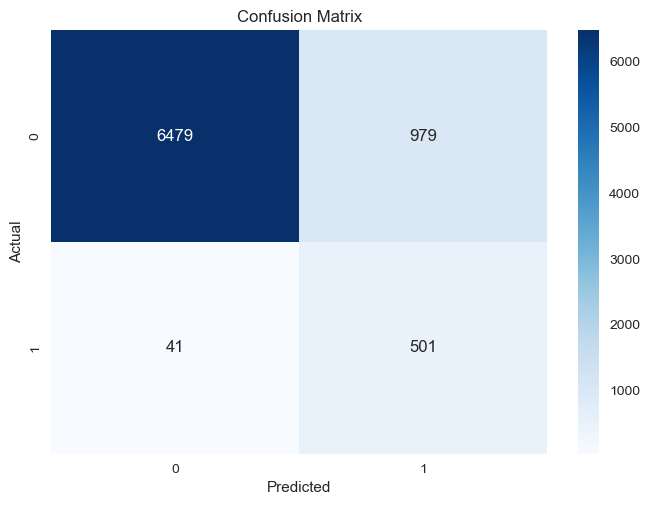

<Figure size 800x550 with 0 Axes>

In [46]:
conf_mtx_tomek_2 = metrics.confusion_matrix(y_test,y_pred_xgb_2)
sns.heatmap(pd.DataFrame(conf_mtx_tomek_2), annot = True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.clf()

In [47]:
print(classification_report(y_test, y_pred_xgb_2, target_names = names))

                 precision    recall  f1-score   support

non-subscribers       0.99      0.87      0.93      7458
    subscribers       0.34      0.92      0.50       542

       accuracy                           0.87      8000
      macro avg       0.67      0.90      0.71      8000
   weighted avg       0.95      0.87      0.90      8000



Based on the outputs above, it happens to notice that the XGBoost Model implemented yielded significant precision results. When the model predicts a customer will subscribe is correct more than 90% of the time.

In [48]:
# Ensure the model has the same feature columns as during training
X = X.reindex(columns=X_train.columns, fill_value=0)

#Get predictions
y_pred_fs_2 = final_model_2.predict(X)

#Total duration for subscribers
X['subscriptions'] = y_pred_fs_2
total_duration_2 = X[X['subscriptions'] == 1]['duration'].sum()
original_duration_2 = deposit['duration'].sum()
print(f"Total duration for predicted subscribers: {total_duration_2} seconds")
print(f"Total duration for the entire dataset: {original_duration} seconds")

time_saved_2 = original_duration_2 - total_duration_2
print(f"Time that can potentially be saved: {time_saved_2} seconds")

Total duration for predicted subscribers: 4731028 seconds
Total duration for the entire dataset: 10192972 seconds
Time that can potentially be saved: 5461944 seconds


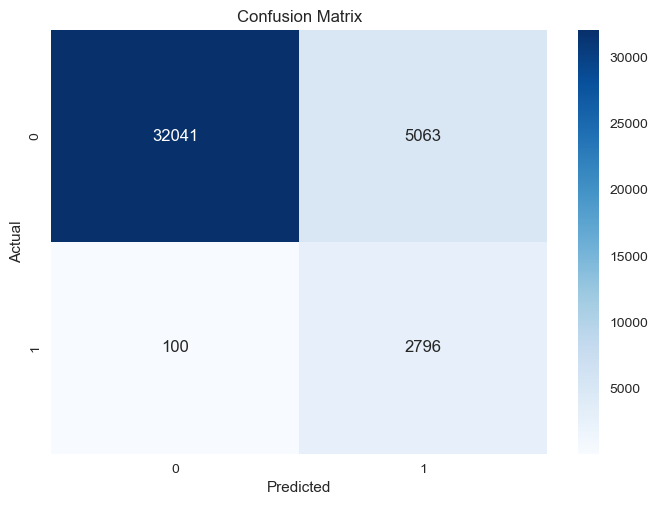

<Figure size 800x550 with 0 Axes>

In [49]:
conf_mtx_xgb_fs_2 = metrics.confusion_matrix(deposit.y,y_pred_fs_2)
sns.heatmap(pd.DataFrame(conf_mtx_xgb_fs_2), annot = True, cmap = 'Blues',fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.clf()

In [50]:
print(classification_report(deposit.y, y_pred_fs_2,target_names = names))

                 precision    recall  f1-score   support

non-subscribers       1.00      0.86      0.93     37104
    subscribers       0.36      0.97      0.52      2896

       accuracy                           0.87     40000
      macro avg       0.68      0.91      0.72     40000
   weighted avg       0.95      0.87      0.90     40000



Based on the outputs above, it can be noticed that the XGBoost model's performance yielded significant results:
- The duration time that can potentially be saved is 5,461,944 seconds (91,032.4 minutes)
- The recall score for class 1 is 0.97, which means that when the model predicts a customer will subscribe to a term deposit, the prediction is correct 97% of the time.
- The duration time that can potentially be saved at the cost of losing 3% of the subscriptions is about 1,517.20 hours (63.22 days).

This model works very effectively identifying potential term deposit subscribers after the calls are made, and it saves a lot of human effort as well.

## Clustering Techniques
In this final step of the project, the main focus is performing some clustering techniques to figure out the variables that potentially help the model to correctly predict the term deposit susbcribers

### K-Means
K-Means clustering aims to group data points into *K* clusters, where each data point belongs to the cluster with the nearest mean (centroid). It is widely used for exploratory data analysis, pattern recognition, and machine learning tasks.

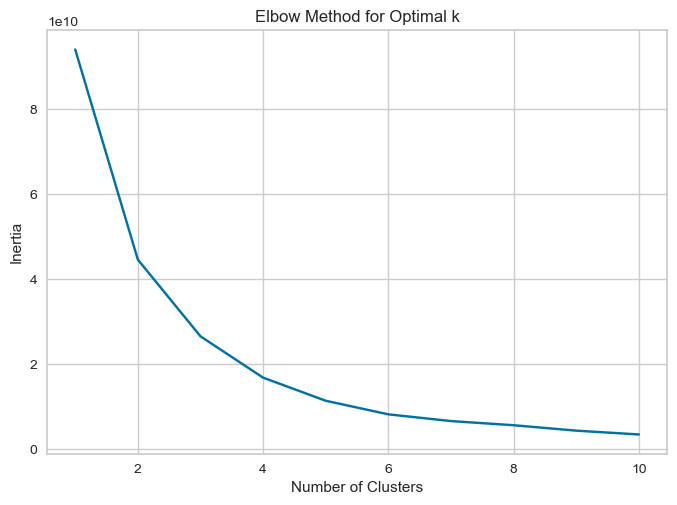

<Figure size 800x550 with 0 Axes>

In [51]:
from sklearn.cluster import KMeans
X_subscribers = X[X['subscriptions'] == 1]
X_cluster = X_subscribers.drop(['subscriptions'],axis=1)
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=seed)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
plt.clf()

In [52]:
# Assuming X_subscribers and X_cluster have already been defined
X_subscribers = X[X['subscriptions'] == 1]
X_cluster = X_subscribers.drop(['subscriptions'], axis=1)

# Fit the KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=seed)
X_cluster_with_labels = X_cluster.copy()  # Copy the DataFrame to avoid modifying the original
X_cluster_with_labels['cluster'] = kmeans.fit_predict(X_cluster)

# Analyze the clusters
cluster_analysis_1 = X_cluster_with_labels.groupby('cluster').mean()
print(cluster_analysis_1)

               age       balance        day     month    duration  campaign  \
cluster                                                                       
0        39.669075    752.622475  15.029052  5.507005  611.737059  2.442560   
1        41.962398   6195.850610  15.663618  6.016260  546.170732  2.282520   
2        41.904255  22721.819149  15.861702  6.308511  483.053191  2.648936   

         job_admin  job_blue-collar  job_entrepreneur  job_housemaid  ...  \
cluster                                                               ...   
0         0.122843         0.197316          0.034656       0.019614  ...   
1         0.087398         0.181911          0.018293       0.022358  ...   
2         0.063830         0.074468          0.031915       0.042553  ...   

         education_unknown  default_no  default_yes  housing_no  housing_yes  \
cluster                                                                        
0                 0.037900    0.983926     0.016074    0.4

### PCA (Principal Component Analysis)
Principal Component Analysis (PCA) is a widely used statistical technique for dimensionality reduction, feature extraction, and data visualization. It transforms a high-dimensional dataset into a lower-dimensional space while preserving as much variance (information) as possible.

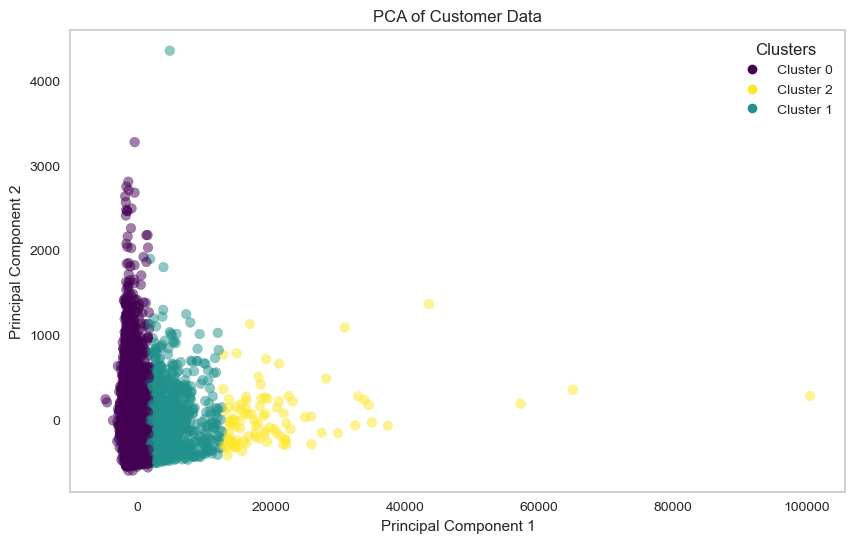

<Figure size 800x550 with 0 Axes>

In [64]:
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_cluster)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = X_subscribers['subscriptions']  # Include target variable for color-coding

# Plot the PCA results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], 
                      c=X_cluster_with_labels['cluster'], cmap='viridis', alpha=0.5)
unique_clusters = X_cluster_with_labels['cluster'].unique()
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                       markerfacecolor=scatter.cmap(scatter.norm(cluster))) for cluster in unique_clusters]
plt.title('PCA of Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=handles, title='Clusters')
plt.grid()
plt.show()
plt.clf()

In [54]:
pca.explained_variance_ratio_

array([0.98820297, 0.01178   ])

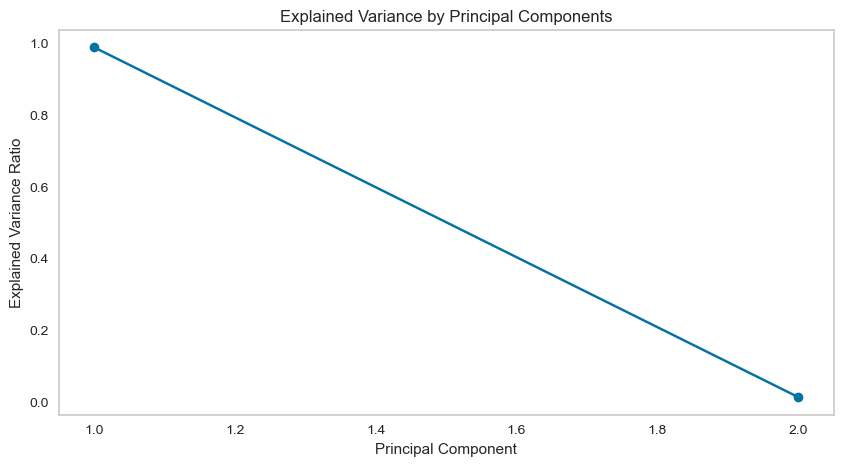

<Figure size 800x550 with 0 Axes>

In [55]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()
plt.clf()

In [56]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X_cluster.columns)
print(loadings)

# Sort the loadings by absolute value for each principal component
for i in range(loadings.shape[1]):
    print(f"Top features for Principal Component {i+1}:")
    print(loadings.iloc[:, i].abs().sort_values(ascending=False).head(10))  # Top 10 features
    print("\n")

                              PC1       PC2
age                  2.450317e-04  0.000200
balance              9.999688e-01  0.007893
day                  1.859008e-05  0.001018
month                4.727876e-05  0.001301
duration            -7.893152e-03  0.999967
campaign            -1.086316e-05  0.000583
job_admin           -4.199726e-06 -0.000042
job_blue-collar     -5.065172e-06  0.000119
job_entrepreneur    -1.096316e-06  0.000005
job_housemaid        4.889320e-07  0.000010
job_management       1.100488e-05 -0.000056
job_retired          1.048759e-06 -0.000036
job_self-employed    6.050428e-07  0.000009
job_services        -2.698100e-06  0.000042
job_student          1.210558e-07 -0.000040
job_technician      -6.432125e-07 -0.000006
job_unemployed       7.564605e-08 -0.000003
job_unknown          3.582087e-07 -0.000001
marital_divorced    -3.398338e-06  0.000017
marital_married      1.404900e-06  0.000067
marital_single       1.993437e-06 -0.000083
education_primary   -2.613743e-0

### t-SNE
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a popular machine learning technique primarily used for visualizing high-dimensional data in lower dimensions (typically 2D or 3D). It excels in preserving local structures in the data while providing a meaningful representation of its global structure.

In [57]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=seed, perplexity=30)

# Fit and transform the data
X_tsne = tsne.fit_transform(X_cluster)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['Component 1', 'Component 2'])
tsne_df['Target'] = X_subscribers['subscriptions']

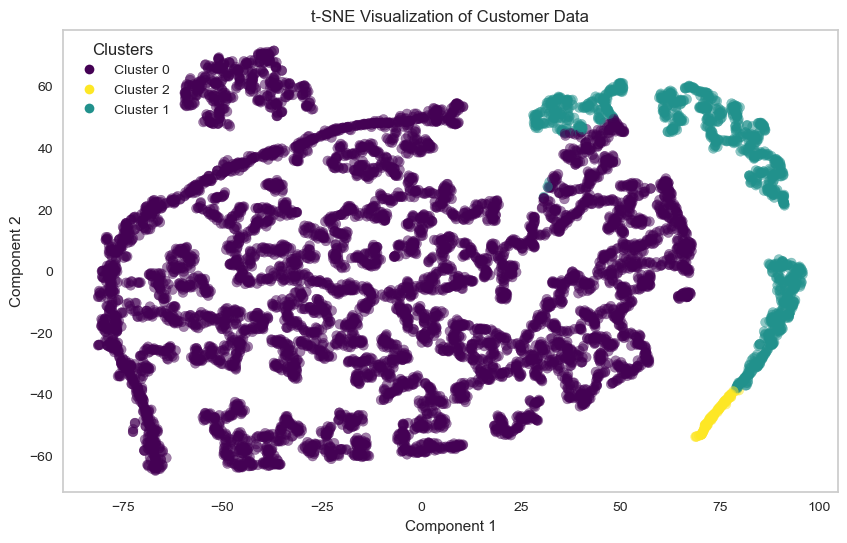

<Figure size 800x550 with 0 Axes>

In [58]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_df['Component 1'], tsne_df['Component 2'], 
                      c=X_cluster_with_labels['cluster'], cmap='viridis', alpha=0.5)
plt.title('t-SNE Visualization of Customer Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(handles=handles, title='Clusters')
plt.grid()
plt.show()
plt.clf()

### Hierarchical Clustering
Hierarchical clustering creates a tree-like structure (dendrogram) to represent the nested grouping of observations. Each node in the dendrogram represents a cluster of data points, and the branches illustrate how clusters are merged or split.

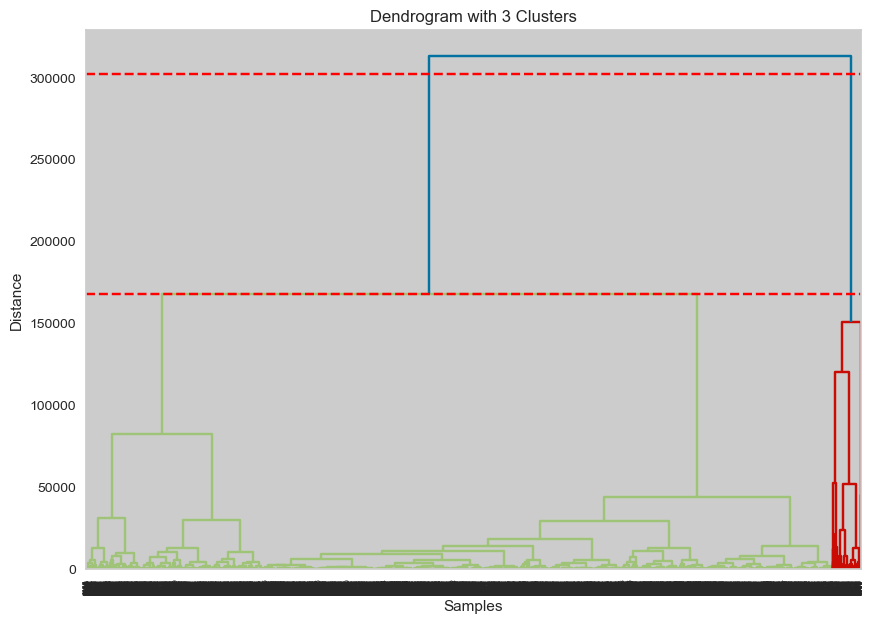

<Figure size 800x550 with 0 Axes>

In [73]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linked = linkage(X_cluster, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)

# Add cluster lines for visual reference
num_clusters = 3
clusters = fcluster(linked, num_clusters, criterion='maxclust')

for i in range(1, num_clusters):
    plt.axhline(y=i * (linked[-(i + 1), 2] if i < len(linked) else 0), color='red', linestyle='--')

plt.title(f'Dendrogram with {num_clusters} Clusters')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
plt.clf()

### UMAP
UMAP (Uniform Manifold Approximation and Projection) is a non-linear dimensionality reduction technique that is particularly effective for visualizing high-dimensional data. It is designed to maintain the relationships between data points when projecting them into a lower-dimensional space, making it a powerful tool for data exploration, visualization, and even clustering.

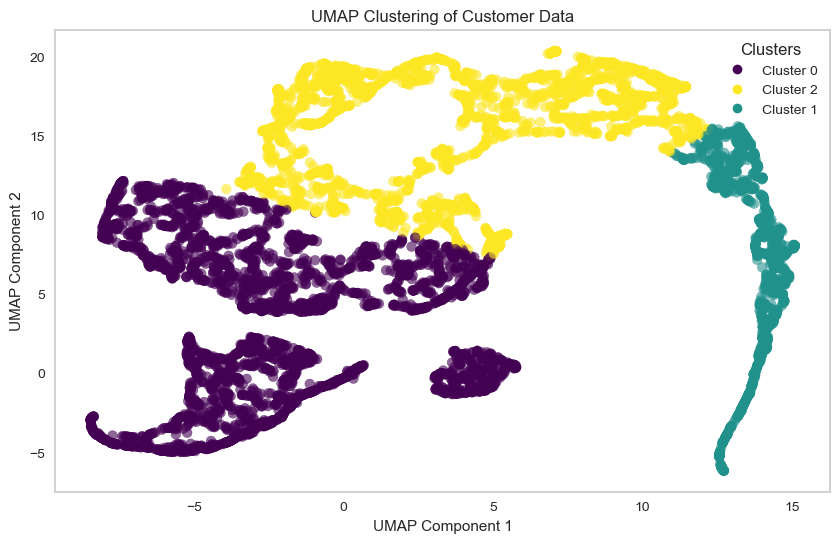

<Figure size 800x550 with 0 Axes>

In [62]:
import umap
# Assuming X_cluster is your feature data
# Step 1: Apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=seed)
X_umap = umap_model.fit_transform(X_cluster)

# Step 2: Create a DataFrame for UMAP results
umap_df = pd.DataFrame(data=X_umap, columns=['UMAP Component 1', 'UMAP Component 2'])

# Optional: Apply KMeans clustering on UMAP results
n_clusters = 3  # You can choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=seed)
umap_df['Cluster'] = kmeans.fit_predict(X_umap)

# Step 3: Plot UMAP results with clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(umap_df['UMAP Component 1'], umap_df['UMAP Component 2'], 
                      c=umap_df['Cluster'], cmap='viridis', alpha=0.6)

plt.title('UMAP Clustering of Customer Data')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(handles=handles, title='Clusters')
plt.grid()
plt.show()
plt.clf()

In [79]:
cluster_analysis_1.T

cluster,0,1,2
age,39.669075,41.962398,41.904255
balance,752.622475,6195.850610,22721.819149
day,15.029052,15.663618,15.861702
month,5.507005,6.016260,6.308511
duration,611.737059,546.170732,483.053191
campaign,2.442560,2.282520,2.648936
job_admin,0.122843,0.087398,0.063830
job_blue-collar,0.197316,0.181911,0.074468
job_entrepreneur,0.034656,0.018293,0.031915
job_housemaid,0.019614,0.022358,0.042553


Based on the outputs above, there are some average characteristics in the 3 different clusters that best idetify potential subscribers:
- Clients older than 40 years
- Clients with management jobs
- Married clients
- Clients that do not have credit in default
- Clients that have a housing loan
- Clients that do not have a personal loan
- Clients that us a cellular as a contact communication type

## Conclusion
The primary objective of this project was developing a robust machine learning system that leverages information coming from call center data in the European banking market.
- The dataset has 40,000 observations and 14 variables, there are 5 numerical variables (age, balance, day, duration, and campaign), 5 categorical variables (job, marital, education, contact, and month), and 4 binary variables(default, housing, loan, and y), there are no missing values, and the proportion of clients that did not subscribe to a term deposit (92.8%) is relatively higher than the clients that did (7.2%)
- It can be noticed the clients that tend to not subscribe to a term deposit share some common characteristics with the clients that tend to do so, such as married clients, clients with secondary education, clients that use cellular as contact communication type, clients with May as the last month of contact; it happens to notice that there are no records of September as the last month of contact, clients that have no credit in default, clients that have a housing loan, etc.
- The methods considered for the imabalance challenge created four different balanced training datasets that were considered to determine whether or not a client will subscribe to a term deposit
- In Stage 1 (Before Calls), the XGBoost model's performance yielded significant results, and it worked very effectively identifying potential term deposit subscribers before making calls, which saves a lot of human effort as well
- In Stage 2 (After Calls), the model predicts a customer will subscribe is correct more than 90% of the time, and saves a lot of human effort
- The different clustering techniques performed yielded 3 different clusters with common variables that are potentially significant to determine the subscription of a client